In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [25]:
df = pd.read_csv("zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [26]:
columns_to_remove = ['url', 'address', 'phone', 'dish_liked', 'cuisines', 'approx_cost(for two people)', 'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)']

df.drop(columns=columns_to_remove, inplace=True)

In [27]:
df.head(10)

,name,online_order,book_table,rate,votes,location,rest_type
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining"
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining
5,Timepass Dinner,Yes,No,3.8/5,286,Basavanagudi,Casual Dining
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,Mysore Road,Casual Dining
7,Onesta,Yes,Yes,4.6/5,2556,Banashankari,"Casual Dining, Cafe"
8,Penthouse Cafe,Yes,No,4.0/5,324,Banashankari,Cafe
9,Smacznego,Yes,No,4.2/5,504,Banashankari,Cafe


In [30]:
df['rest_type'].value_counts()

Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

In [32]:
# Get the top 5 classifications
top_classifications = df['rest_type'].value_counts().index[:5]

# Filter the DataFrame to keep only the top 5 classifications
df = df[df['rest_type'].isin(top_classifications)]

In [33]:
df['rest_type'].value_counts()

Quick Bites       19132
Casual Dining     10330
Cafe               3732
Delivery           2604
Dessert Parlor     2263
Name: rest_type, dtype: int64

In [37]:
df['location'].value_counts()

0     4101
22    1926
45    1735
29    1642
32    1570
      ... 
11       3
30       3
68       2
88       2
64       1
Name: location, Length: 93, dtype: int64

In [38]:
# Get the top 10 classifications
top_classifications = df['location'].value_counts().index[:10]

# Filter the DataFrame to keep only the top 10 classifications
df = df[df['location'].isin(top_classifications)]

In [39]:
df['location'].value_counts()

0     4101
22    1926
45    1735
29    1642
32    1570
89    1471
27    1468
56    1386
3     1208
19     973
Name: location, dtype: int64

In [40]:
df.isnull().sum()

name               0
online_order       0
book_table         0
rate            2628
votes              0
location           0
rest_type          0
dtype: int64

In [41]:
le = LabelEncoder()
df['online_order'] = le.fit_transform(df['online_order'])
df['book_table'] = le.fit_transform(df['book_table'])
df['location'] = le.fit_transform(df['location'])
df['rest_type'] = le.fit_transform(df['rest_type'])

In [42]:
df.head(10)

,name,online_order,book_table,rate,votes,location,rest_type
38,Empire Restaurant,1,0,4.4/5,4884,6,1
53,Biryanis And More,1,0,4.0/5,618,6,1
66,Namma Brahmin's Idli,1,0,3.6/5,34,6,4
86,Meghana Foods,1,0,4.4/5,4401,6,1
148,Sri Udupi Food Hub,1,1,4.1/5,175,6,1
155,Roll Over,1,0,4.1/5,438,6,3
159,Wahab,1,0,3.7/5,97,6,4
162,Canton,1,0,3.6/5,195,6,1
164,The Blue Wagon - Kitchen,1,0,4.6/5,228,6,0
166,Patio 805,1,1,4.1/5,364,6,1


In [43]:
df.isnull().sum()

name               0
online_order       0
book_table         0
rate            2628
votes              0
location           0
rest_type          0
dtype: int64

In [44]:
df.drop(columns="rate", inplace=True)

In [45]:
df.isnull().sum()

name            0
online_order    0
book_table      0
votes           0
location        0
rest_type       0
dtype: int64

In [46]:
df.head()

,name,online_order,book_table,votes,location,rest_type
38,Empire Restaurant,1,0,4884,6,1
53,Biryanis And More,1,0,618,6,1
66,Namma Brahmin's Idli,1,0,34,6,4
86,Meghana Foods,1,0,4401,6,1
148,Sri Udupi Food Hub,1,1,175,6,1


In [47]:
X = df[['online_order', 'book_table', 'location']]
y = df['rest_type'] 

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

In [50]:
# Train the classifier on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [51]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

In [52]:
from sklearn import tree
d=clf

[Text(0.47634345794392524, 0.9444444444444444, 'x[1] <= 0.5\ngini = 0.654\nsamples = 13984\nvalue = [1303, 3850, 949, 846, 7036]'),
 Text(0.13843457943925233, 0.8333333333333334, 'x[2] <= 0.5\ngini = 0.632\nsamples = 12778\nvalue = [1108, 2875, 949, 846, 7000]'),
 Text(0.037383177570093455, 0.7222222222222222, 'x[0] <= 0.5\ngini = 0.499\nsamples = 3155\nvalue = [194, 506, 209, 92, 2154]'),
 Text(0.018691588785046728, 0.6111111111111112, 'gini = 0.413\nsamples = 1132\nvalue = [63, 140, 46, 31, 852]'),
 Text(0.056074766355140186, 0.6111111111111112, 'gini = 0.541\nsamples = 2023\nvalue = [131, 366, 163, 61, 1302]'),
 Text(0.23948598130841123, 0.7222222222222222, 'x[2] <= 2.5\ngini = 0.665\nsamples = 9623\nvalue = [914, 2369, 740, 754, 4846]'),
 Text(0.09345794392523364, 0.6111111111111112, 'x[2] <= 1.5\ngini = 0.593\nsamples = 1668\nvalue = [103, 397, 98, 98, 972]'),
 Text(0.056074766355140186, 0.5, 'x[0] <= 0.5\ngini = 0.619\nsamples = 916\nvalue = [66, 206, 52, 78, 514]'),
 Text(0.0373

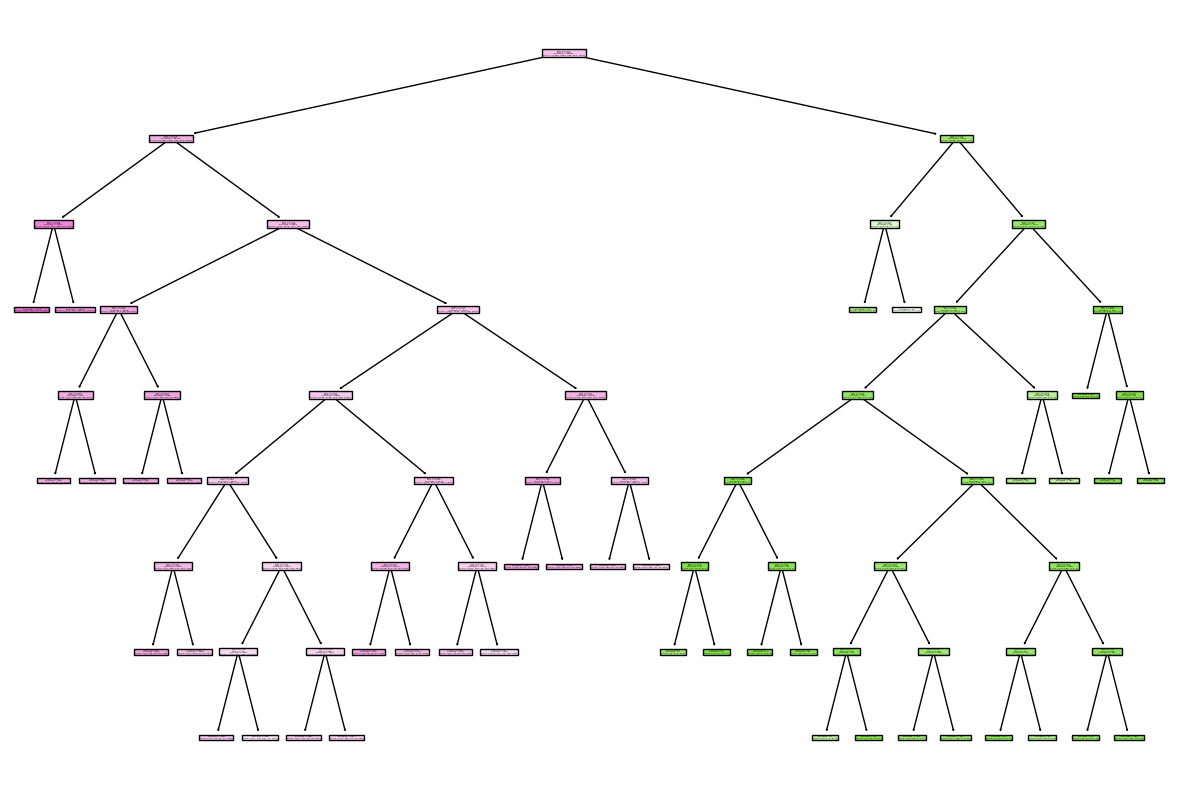

In [53]:
plt.figure(figsize=(15,10))
tree.plot_tree(d,filled=True)

In [64]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.5892448512585813
Confusion Matrix:
[[   0   49    0    0  257]
 [   0  252    0    0  680]
 [   0    0    0    0  240]
 [   0    0    0    0  201]
 [   0    9    0    0 1808]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       306
           1       0.81      0.27      0.41       932
           2       0.00      0.00      0.00       240
           3       0.00      0.00      0.00       201
           4       0.57      1.00      0.72      1817

    accuracy                           0.59      3496
   macro avg       0.28      0.25      0.23      3496
weighted avg       0.51      0.59      0.48      3496



D:\Vybhav\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

D:\Vybhav\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

D:\Vybhav\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# Random forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rfc=RandomForestClassifier(n_estimators=300)

In [67]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [68]:
pred_rfc=rfc.predict(X_test)

In [69]:
print(confusion_matrix(y_test,pred_rfc))
print('\n')
print(classification_report(y_test,pred_rfc))

[[   0   49    0    0  257]
 [   0  252    0    0  680]
 [   0    0    0    0  240]
 [   0    0    0    0  201]
 [   0    9    0    0 1808]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       306
           1       0.81      0.27      0.41       932
           2       0.00      0.00      0.00       240
           3       0.00      0.00      0.00       201
           4       0.57      1.00      0.72      1817

    accuracy                           0.59      3496
   macro avg       0.28      0.25      0.23      3496
weighted avg       0.51      0.59      0.48      3496



D:\Vybhav\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

D:\Vybhav\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

D:\Vybhav\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

